# Credit Score Classification

#### About Dataset

**Problem Statement**
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**
- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

**Features Information**

- **ID -- Represents a unique identification of an entry**
- **Customer_ID -- Represents a unique identification of a person**
- **Month -- Represents the month of the year**
- **Name -- Represents the name of a person**
- **Age -- Represents the age of the person**
- **SSN -- Represents the social security number of a person**
- **Occupation -- Represents the occupation of the person**
- **Annual_Income -- Represents the annual income of the person**
- **Monthly_Inhand_Salary --Represents the monthly base salary of a person**
- **Num_Bank_Accounts -- Represents the number of bank accounts a person holds**
- **Num_Credit_Card --Represents the number of other credit cards held by a person**
- **Interest_Rate -- Represents the interest rate on credit card**
- **Num_of_Loan -- Represents the number of loans taken from the bank**
- **Type_of_Loan -- Represents the types of loan taken by a person**
- **Delay_from_due_date -- Represents the average number of days delayed from the payment date**
- **Num_of_Delayed_Payment -- Represents the average number of payments delayed by a person**
- **Changed_Credit_Limit -- Represents the percentage change in credit card limit**
- **Num_Credit_Inquiries -- Represents the number of credit card inquiries**
- **Credit_Mix --Represents the classification of the mix of credits**
- **Outstanding_Debt -- Represents the remaining debt to be paid (in USD)**
- **Credit_Utilization_Ratio -- Represents the utilization ratio of credit card**
- **Credit_History_Age -- Represents the age of credit history of the person**
- **Payment_of_Min_Amount -- Represents whether only the minimum amount was paid by the person**
- **Total_EMI_per_month -- Represents the monthly EMI payments (in USD)**
- **Amount_invested_monthly -- Represents the monthly amount invested by the customer (in USD)**
- **Payment_Behaviour -- Represents the payment behavior of the customer (in USD)**
- **Monthly_Balance -- Represents the monthly balance amount of the customer (in USD)**
- **Credit_Score --Represents the bracket of credit score (Poor, Standard, Good)**

# Dataset Overview

| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| **ID**                      | A unique identifier for each record in the dataset.                         |
| **Customer_ID**             | Unique identifier assigned to each customer.                                |
| **Month**                   | Month for which the data entry was recorded.                               |
| **Name**                    | Full name of the customer.                                                  |
| **Age**                     | Age of the customer in years.                                               |
| **SSN**                     | Social Security Number – a unique personal identifier.                      |
| **Occupation**              | Job title or profession of the customer.                                    |
| **Annual_Income**           | Total income earned by the customer in a year (USD).                        |
| **Monthly_Inhand_Salary**  | Monthly base salary received in-hand after deductions (USD).                |
| **Num_Bank_Accounts**       | Number of bank accounts held by the customer.                               |
| **Num_Credit_Card**         | Number of other credit cards held by the customer.                          |
| **Interest_Rate**           | Interest rate applied to the customer's credit card.                        |
| **Num_of_Loan**             | Total number of loans taken by the customer.                                |
| **Type_of_Loan**            | Types of loans taken (e.g., Home Loan, Auto Loan).                          |
| **Delay_from_due_date**     | Average number of days payment is delayed past due date.                    |
| **Num_of_Delayed_Payment**  | Number of delayed payments by the customer.                                 |
| **Changed_Credit_Limit**    | Percentage change in credit card limit.                                     |
| **Num_Credit_Inquiries**    | Number of recent credit card inquiries.                                     |
| **Credit_Mix**              | Classification of the customer's credit portfolio (e.g., Good, Standard).   |
| **Outstanding_Debt**        | Remaining unpaid debt (USD).                                                |
| **Credit_Utilization_Ratio**| Ratio of credit used vs. total available credit.                            |
| **Credit_History_Age**      | Age of the customer’s credit history.                                       |
| **Payment_of_Min_Amount**   | Indicates if only the minimum payment was made (Yes/No/NA).                 |
| **Total_EMI_per_month**     | Monthly EMI payments by the customer (USD).                                 |
| **Amount_invested_monthly** | Monthly amount invested by the customer (USD).                              |
| **Payment_Behaviour**       | Customer’s payment behavior (e.g., Full Payment, Delay, Minimum).           |
| **Monthly_Balance**         | Amount left in account at month's end (USD).                                |
| **Credit_Score**            | Credit score category: Poor, Standard, or Good.                             |


## Import libraries


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [103]:
pd.set_option('display.max_columns', None)

In [104]:
df = pd.read_csv('./dataset.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


-------

## Data Preprocessing

### Summary of Dataset

In [105]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- We have 1 Lac instances of 28 Features
- 7 Int, 9 Float, 12 object dtypes

In [106]:
num = df.select_dtypes(include=['number']).columns

for i in num:
    print(f'Unique values of {i}: {df[i].nunique()}')
    print(f'Values Counts of: {df[i].value_counts()}')
    print(f'Unique values: {df[i].unique()}')
    print('=' * 70)
    print('\n')

Unique values of Monthly_Inhand_Salary: 13235
Values Counts of: Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64
Unique values: [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]


Unique values of Num_Bank_Accounts: 943
Values Counts of: Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64
Unique values: [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210


-----------



### Data Cleaning

- Some missing values in Name column, monthly inhand salary,Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance
- Convert Age, Num of loan, Num_of_Delayed_Payment into INT
- Convert Annual income, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance into Float

Convert the object dtype column into INT

In [107]:
into_int = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Delay_from_due_date', 'Num_Credit_Inquiries']

df[into_int] = df[into_int].apply(pd.to_numeric, errors='coerce').astype('Int64')

Convert the object dtype column into Float

In [108]:
into_float = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

df[into_float] = df[into_float].apply(pd.to_numeric, errors='coerce')

In [109]:
df.rename(columns={'Interest_Rate':'Interest_Rate_%'}, inplace=True)

We have various Age values around 8124. Credit cards were issued to customers at the age of 18, but we also have some Age values greater than 100 and less than 18, which is likely a data entry error

I initially replace ages above 60, with nan

In [110]:
df.loc[(df['Age'] > 60) | (df['Age'] < 0), 'Age'] = np.nan

I replaced the -500 age values with NaN. Since there were around 1,000 such entries, I decided to treat them as missing values for further imputation or analysis

I kept ages under 18 in the dataset since they correspond to students who have taken out student loans.

There are some accounts which is less then 1 so i imputed it with 1

In [111]:
df.loc[df['Num_Bank_Accounts'] < 1, 'Num_Bank_Accounts'] = 1

Since around 75% of the entries in the Num_Bank_Accounts column are less than or equal to 7, I decided to cap the values at 10 by replacing any number of accounts greater than 10 with 10. This helps reduce the effect of outliers while keeping the data realistic

In [112]:
df.loc[df['Num_Bank_Accounts'] > 10, 'Num_Bank_Accounts'] = 10

- Values > 10 are likely unrealistic — most individuals in the U.S. don’t hold more than 10 credit cards.
- Value < 1 convert into 1

In [113]:
df.loc[df['Num_Credit_Card'] > 10, 'Num_Credit_Card'] = 10

df.loc[df['Num_Credit_Card'] < 1, 'Num_Credit_Card'] = 1

In [114]:
df.loc[df['Interest_Rate_%'] > 36, 'Interest_Rate_%'] = 36

To handle data quality issues, we replaced values in the num_of_loan column with NaN where the number of loans was either less than 0 or greater than 9, as such values are unrealistic and likely due to data entry errors

In [115]:
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 9), 'Num_of_Loan'] = np.nan

We removed the minus sign from delay_from_due_date to ensure all values represent the absolute number of days away from the due date. Negative values (early payments) conflicted with the column's meaning, so converting them to positive ensures consistency and simplifies interpretation for modeling.

In [116]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

We replaced extremely high values in num_of_delayed_payments (above 30) with NaN as they are likely outliers or data entry errors, given that 75% of the data is below 18 delays.

In [117]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].abs()

In [118]:
df.loc[df['Num_of_Delayed_Payment'] > 30, 'Num_of_Delayed_Payment'] = np.nan

In [119]:
df.rename(columns={'Changed_Credit_Limit':'Changed_Credit_Limit_%'},inplace=True)

In [120]:
df.loc[df['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'] = np.nan

In [121]:
df.loc[df['Total_EMI_per_month'] > 2000, 'Total_EMI_per_month'] = np.nan

In [122]:
cat = ['Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

In [123]:
for i in cat:
    print(f'Unique values of {i}: {df[i].nunique()}')
    print(f'Values Counts of: {df[i].value_counts()}')
    print(f'Unique values: {df[i].unique()}')
    print('=' * 70)
    print('\n')

Unique values of Month: 8
Values Counts of: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Unique values of Name: 10139
Values Counts of: Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64
Unique values: ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']


Unique values of SSN: 12501
Values Counts of: SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634      

A valid U.S. SSN:
- Is a 9-digit number.
- Follows the format: XXX-XX-XXXX.
- Contains only digits (0–9).
- No letters or special characters like #, %, $, @, *, &, etc.

So we will keep them as it is.

In [124]:
df['Occupation'].replace('_______',np.nan,inplace=True)

In [125]:
df['Credit_Mix'].replace('_', np.nan, inplace=True)

Replace NM with NO

In [126]:
df['Payment_of_Min_Amount'].replace('NM', 'No', inplace=True)

------------

### Handle Missing Values

In [127]:
import missingno as msn

<Axes: >

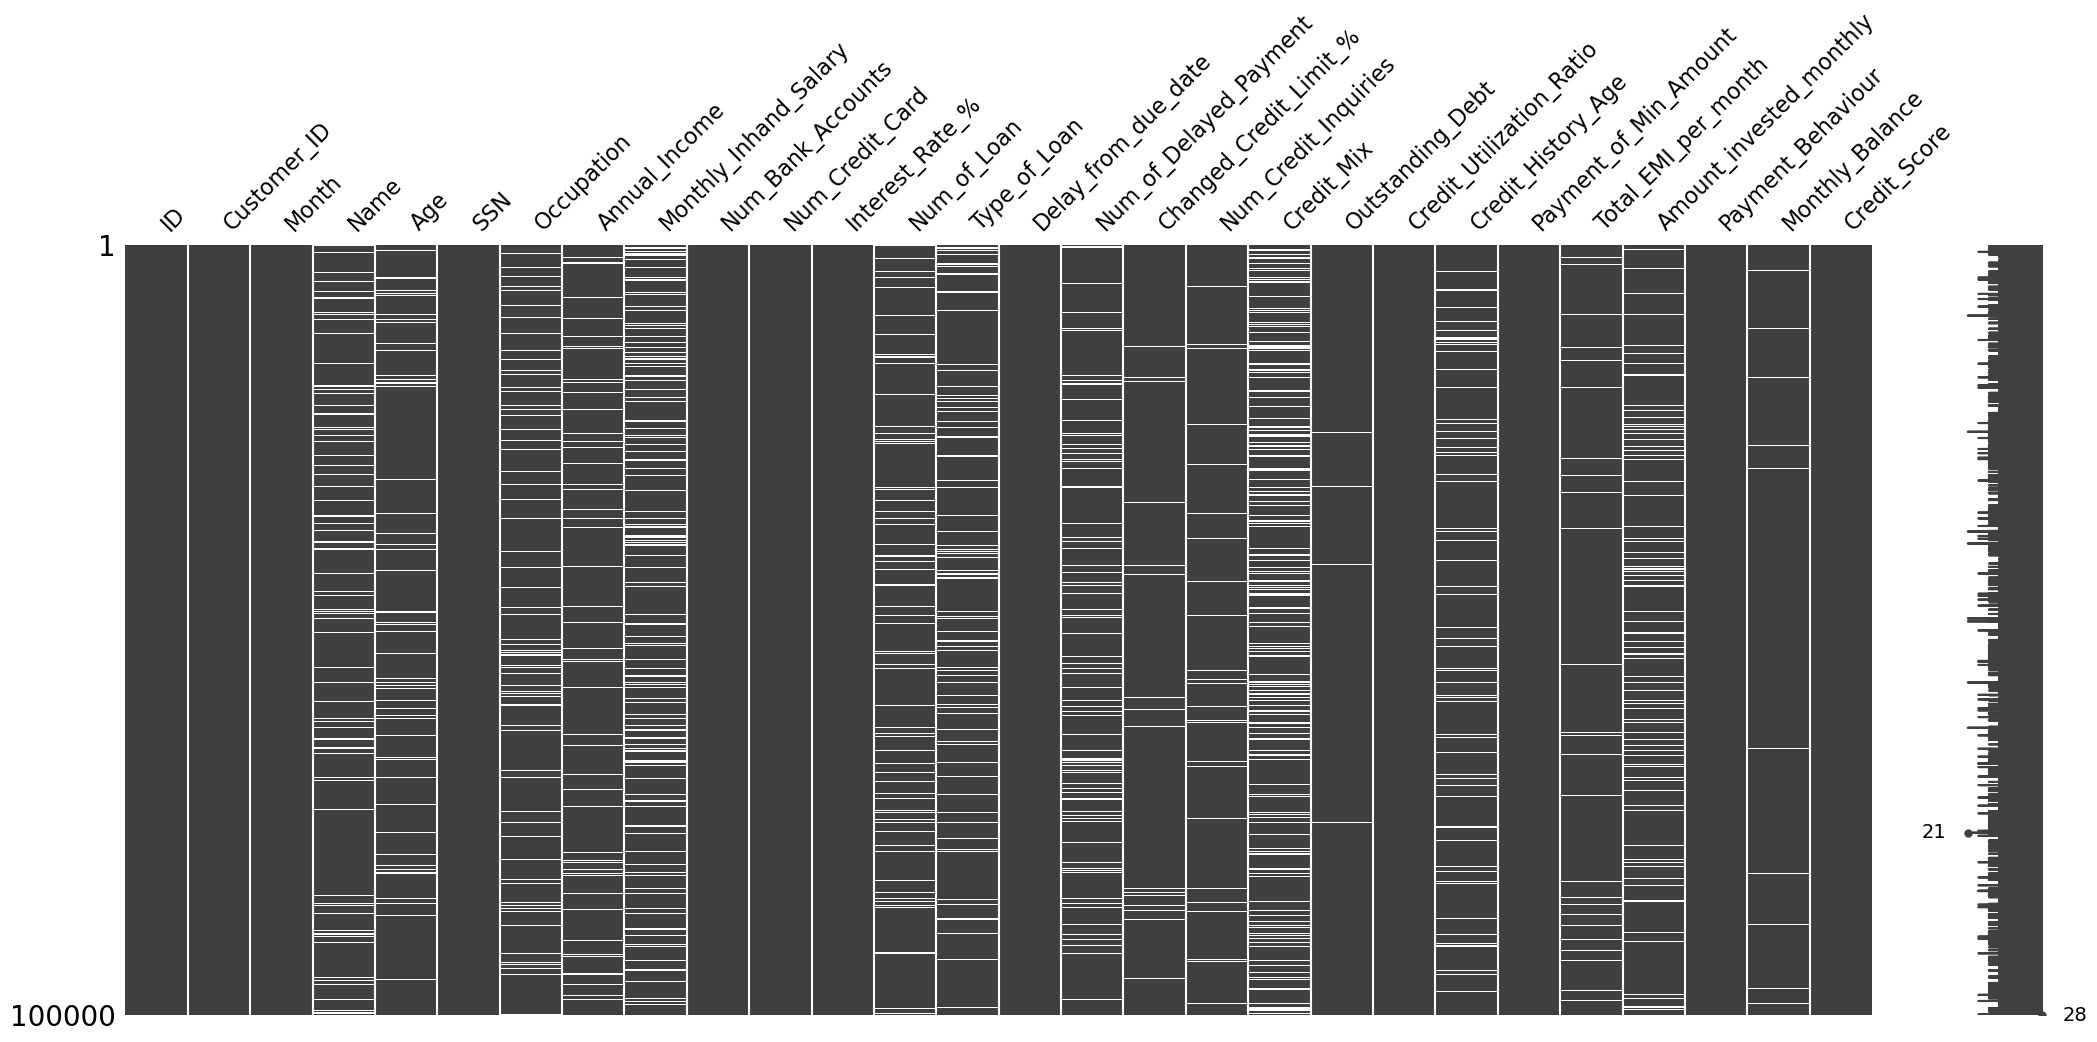

In [128]:
msn.matrix(df)

In [129]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Credit_Mix                  20.195
Monthly_Inhand_Salary       15.002
Type_of_Loan                11.408
Num_of_Delayed_Payment      10.463
Name                         9.985
Num_of_Loan                  9.108
Credit_History_Age           9.030
Amount_invested_monthly      8.784
Age                          7.635
Occupation                   7.062
Annual_Income                6.980
Num_Credit_Inquiries         3.615
Total_EMI_per_month          3.112
Changed_Credit_Limit_%       2.091
Monthly_Balance              1.209
Outstanding_Debt             1.009
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Payment_Behaviour            0.000
ID                           0.000
Delay_from_due_date          0.000
Customer_ID                  0.000
Interest_Rate_%              0.000
Num_Credit_Card              0.000
Num_Bank_Accounts            0.000
SSN                          0.000
Month                        0.000
Credit_Score                 0.000
dtype: float64

In [130]:
num = df.select_dtypes(include=['number']).columns
num_missing = [col for col in num if df[col].isnull().sum() > 0]

- In the numerical columns, the missing values are Missing Completely at Random (MCAR). 
- Filling them with the median can significantly distort the original distribution of the data. 
- Therefore, I decided to impute the missing values using random sampling from the existing (non-missing) values of the same column. This approach helps to preserve the original distribution and variability of the data.

In [131]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        non_null_values = df[col].dropna().values
        df[col] = df[col].apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)

In [132]:
cat = df.select_dtypes(include=['object']).columns
cat_missing = [col for col in cat if df[col].isnull().sum() > 0]
cat_missing

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age']

- One thing I noticed is that the categorical values in columns like Occupation are arranged in a sequential pattern — for example, all instances of "Lawyer" appear first, followed by "Engineer," and so on. To preserve this pattern, I decided to use the forward fill method to impute missing values, which fills them with the most recent non-missing value above. 
- While this approach may introduce some inaccuracies, it maintains the natural order in the data and is more impactful than filling with the mode or a generic "unknown" value.
- Also it maintains the natural order in the data 

In [133]:
unk_missing = ['Name', 'Occupation', 'Type_of_Loan', 'Credit_History_Age']

for i in unk_missing:
    df[i]=df[i].ffill(axis=0)

--------

**Duplicates**

In [134]:
df.duplicated().sum()

0

No Duplicates

-------

### Handle Outliers

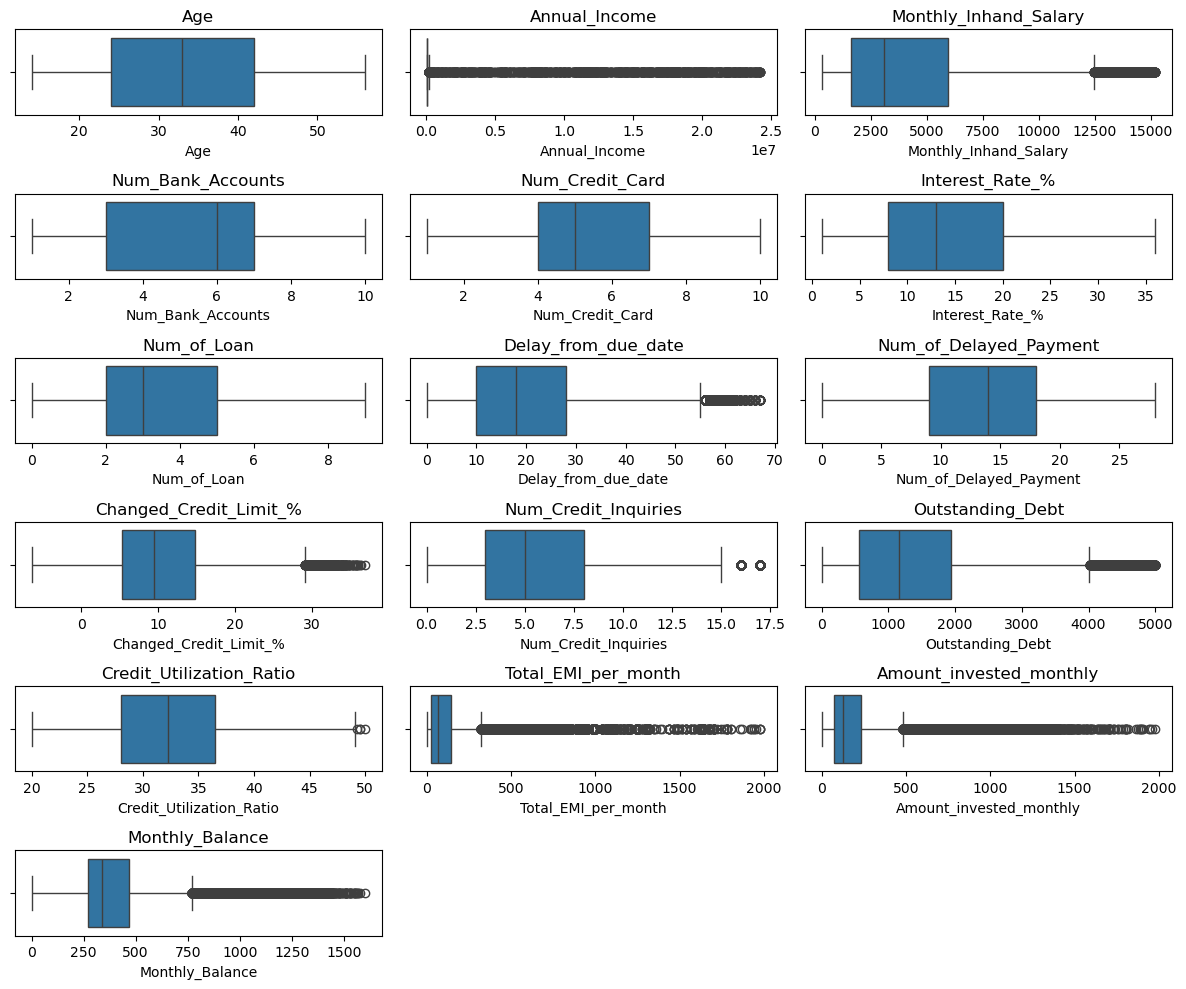

In [135]:
plt.figure(figsize=(12,10))
for i, col in enumerate(num):
    plt.subplot(6,3,i+1)
    sns.boxplot(data= df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

These outliers are valid outliers, so i keep them them as it is.

--------

## Exploratory Data Analysis

### Univariate Analysis

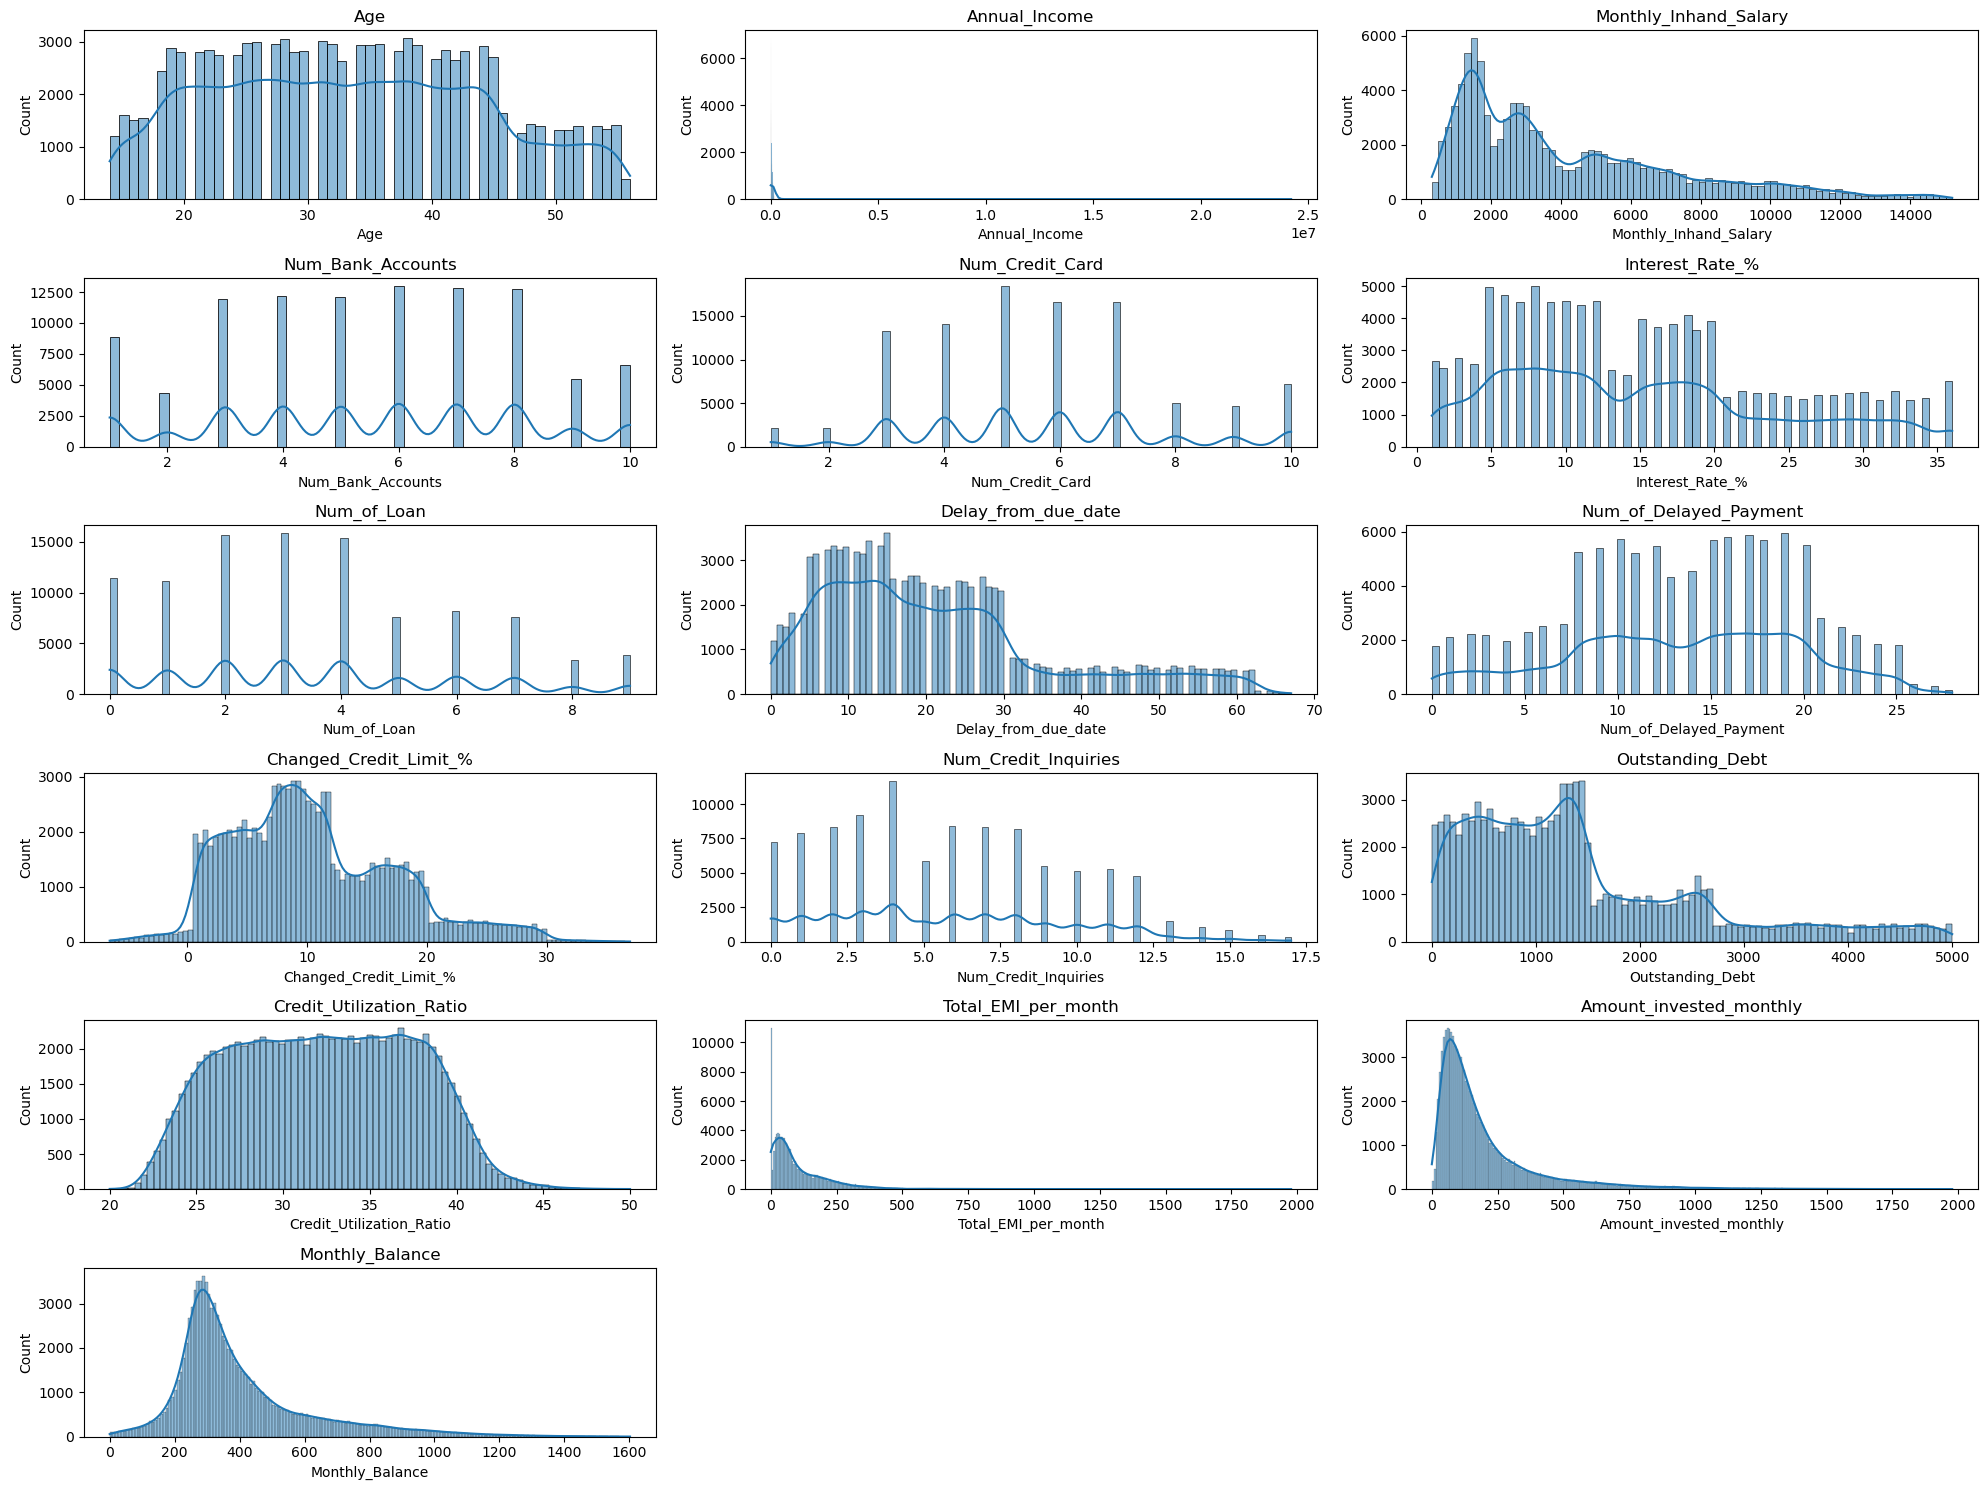

In [136]:
plt.figure(figsize=(20, 15))  

for i, col in enumerate(num):  
    plt.subplot(6, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    
plt.tight_layout()
plt.show()

- Age from 14 to 56
- Annual Income from 7005 to 24198062
- Montly inhand salary from 303 to 15204
- Num bank accounts from 1 to 10
- Num of credit card from 1 to 10
- Interest rate from 1% to 36%
- Num of loan from 0 to 9
- Delay from due date form 0 to 67 days
- Num of delayed paymenta form 0 to 28
- Changed credit limit from -6.5% to ~37%
- Num credit imquiries from 0 to 17 
- Outstanding debt from 0.23 to 4998
- credit utilization ratio from 20 to 50
- total emi per month from 0 to 1977$
- Amount invested monthly from 0 to 1977
- Monthly balance from 0 to 1602

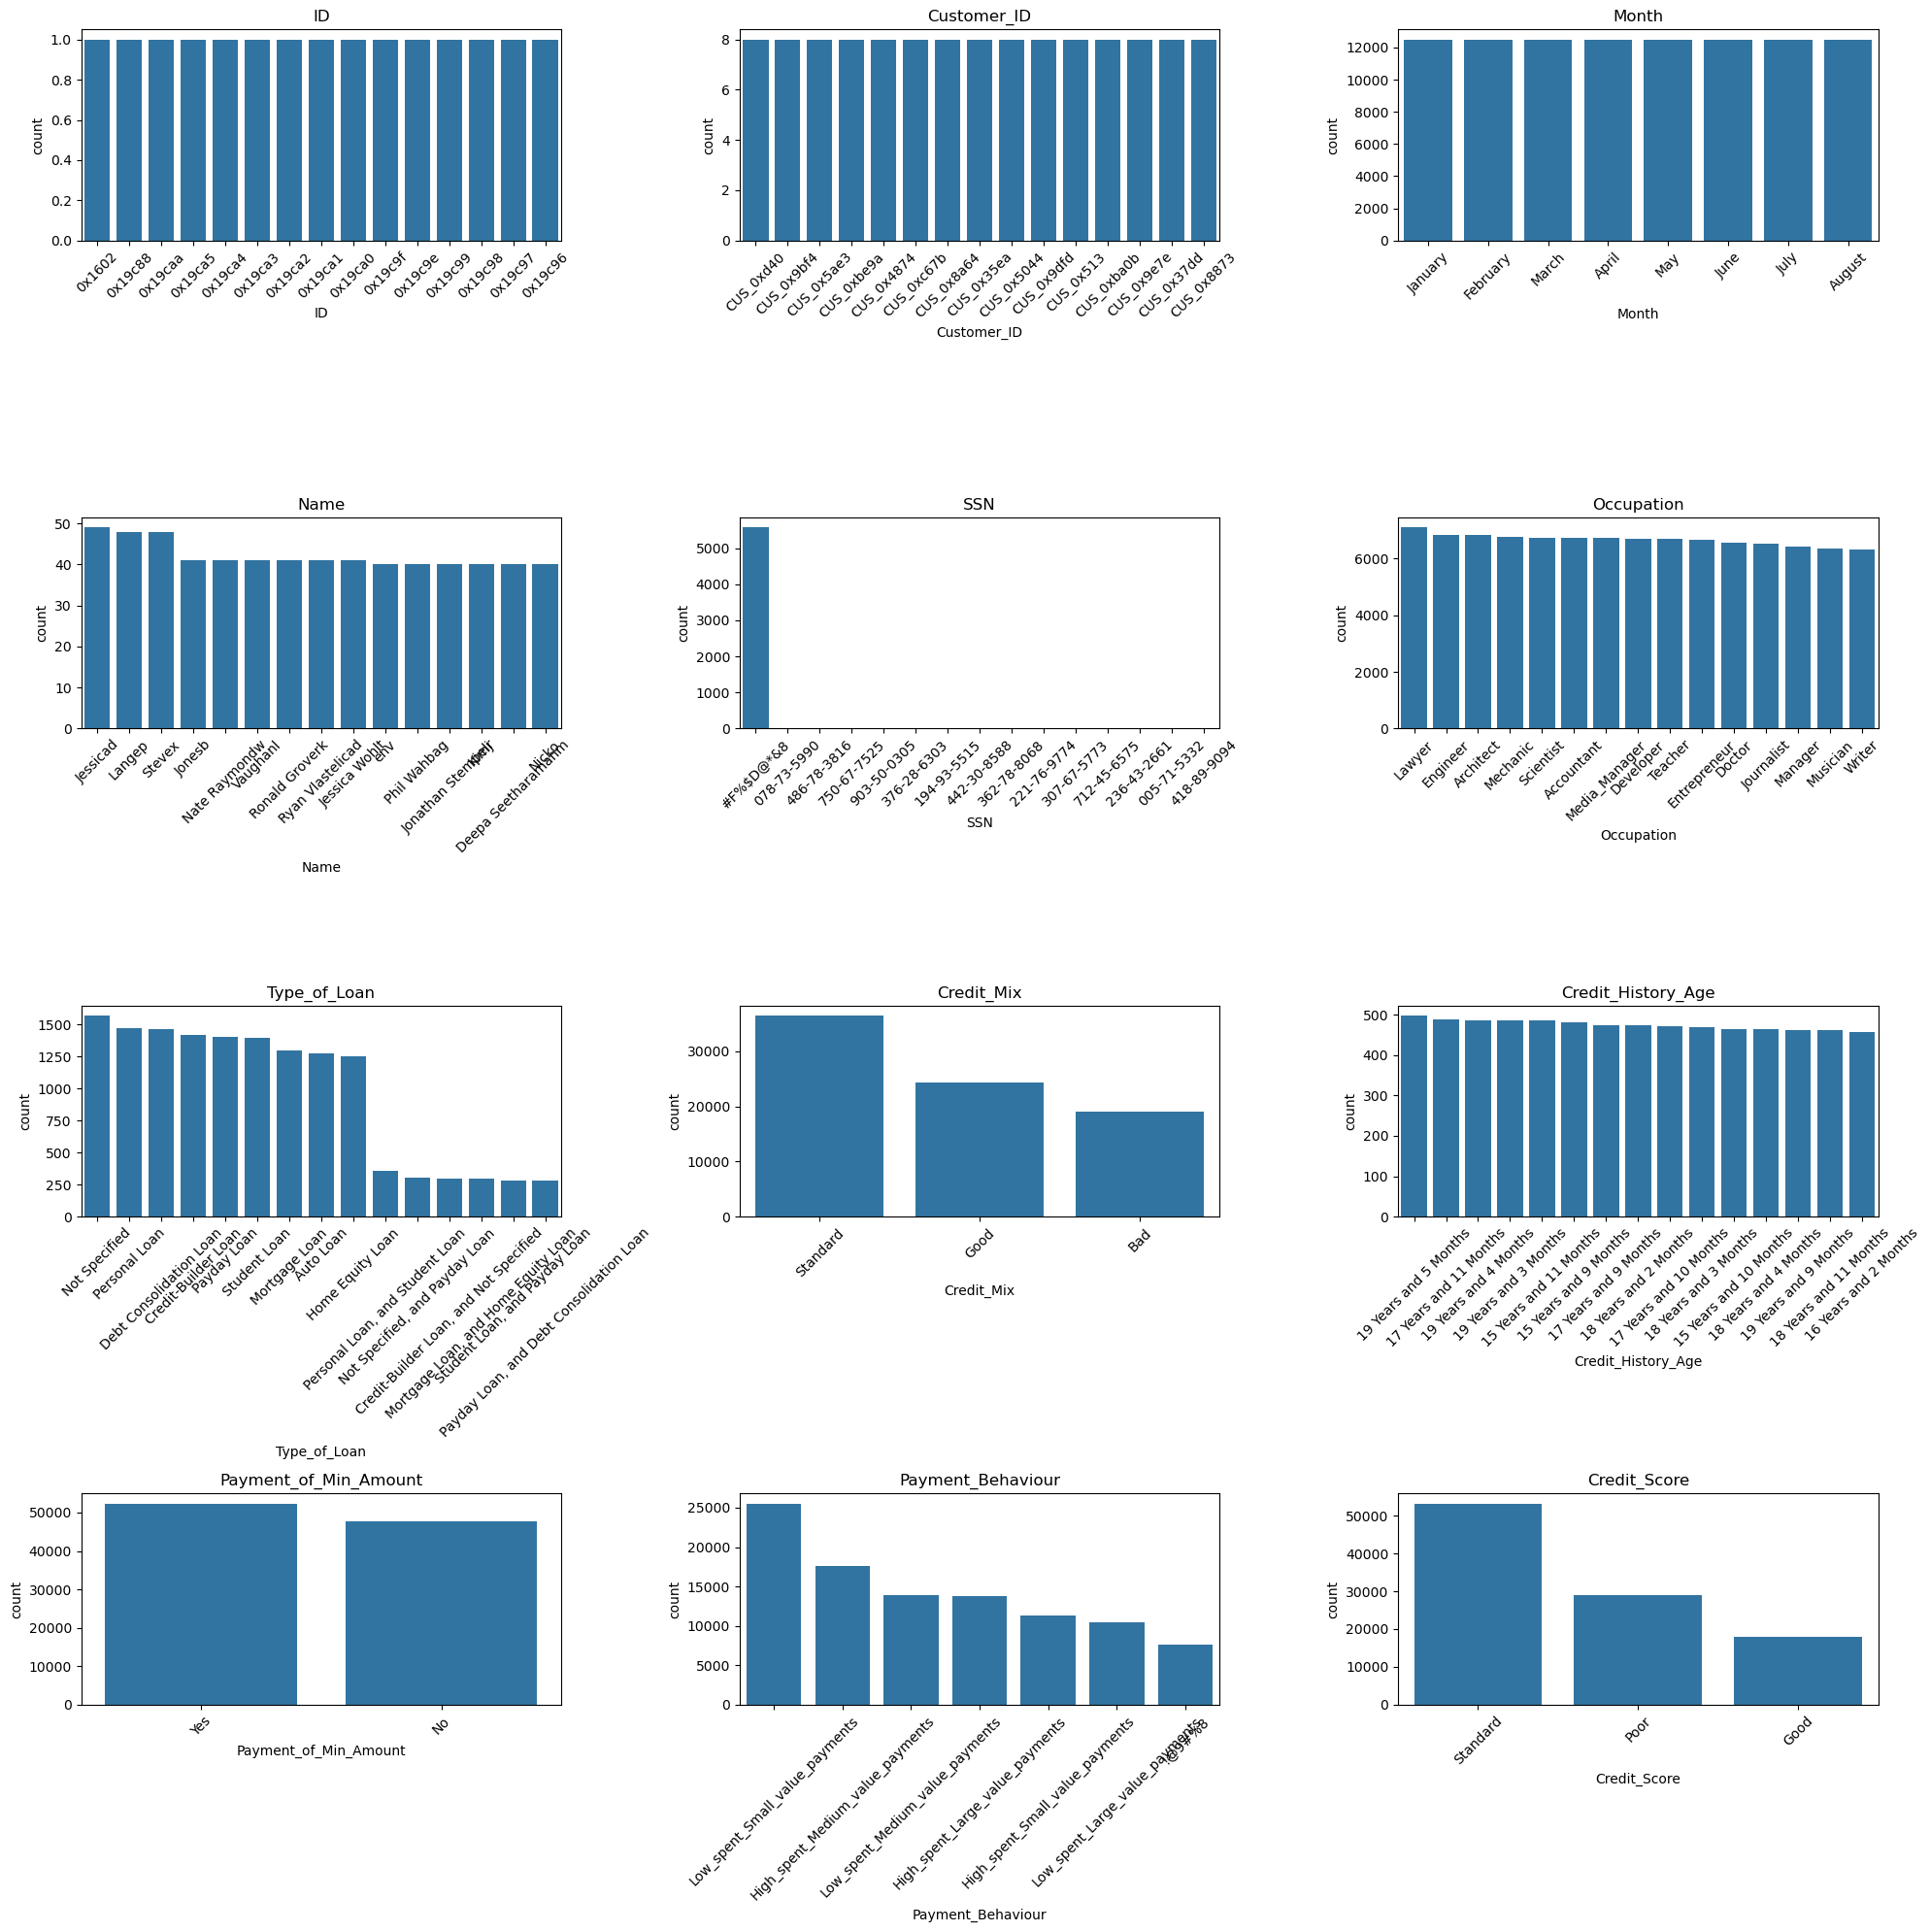

In [138]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cat):  
    plt.subplot(4, 3, i + 1)
    top_15 = df[col].value_counts().nlargest(15).sort_values(ascending=False).index
    sns.countplot(data=df[df[col].isin(top_15)], x=col, order=top_15)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

-  Data is from Jan to Aug total 8 months
-  Total 15 Occupations
-  3 types of credit mix standard, Good, Bad
-  2 types of payment min amount Yes and No
-  3 types of credit score Standard, Good and Poor

-----------

### Bivariate Analysis

In [175]:
pd.set_option('Display.Max_rows', False)

In [176]:
occ_age =df.groupby('Occupation')['Age'].value_counts().reset_index()
occ_age
# sns.barplot(data=df, x=df['Age'])

,Occupation,Age,count
0,Accountant,40.0,247
1,Accountant,38.0,235
2,Accountant,25.0,227
3,Accountant,39.0,225
4,Accountant,32.0,220
5,Accountant,26.0,218
6,Accountant,41.0,218
7,Accountant,28.0,216
8,Accountant,24.0,208
...,...,...,...
